In [22]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np
from datetime import datetime

In [23]:
gold = 'GC=F'
year_10 = '^TNX'
silver = 'SIN21.CMX'
snp = '^GSPC'
nasdaq ='^IXIC'
vix = '^VIX'
dollar = 'DX=F'
##티커

In [24]:
stdscale = StandardScaler()

In [96]:
def scaled(x):
    x_index = x.index
    x_columns = x.columns
    x_scaled = stdscale.fit_transform(x)
    x_scaled = pd.DataFrame(x_scaled, index = x_index, columns=x_columns)
    return x_scaled
##스켕일링

def mdd(x):
    x_max = x['Close'][0]
    x_min = x['Close'][0]
    mdd_list = []
    for i in range(1, len(x)):
        if x_max < x['Close'][i]:
            x_max = x['Close'][i]
        if x_max > x['Close'][i]:
            smdd1 = (x_max - x['Close'][i])/x_max*100
            mdd_list.append(smdd1)
    return max(mdd_list)
##최대낙폭 (mdd) / 종가 기준
def sharp(x):
    df = income(x)
    return (df['income'][-1] - df['income'][0]) / np.std(df['income'])

##샤프지수(일일)

def data(ticker, strdate,enddate = datetime.today()):
    return pdr.DataReader(ticker, 'yahoo', start= strdate, end=enddate)
##티커와 날짜를 넣으면 데이터를 불러와줌. enddated의 경우 초깃값은 프로그램 작동 당일



def day_volatility(x):
    x_mdd = (x['High']-x['Low'])/x['Low']*100
    df = pd.DataFrame(x_mdd, columns = ['day_volatility'])
    return df
##일일 변동성

def day_income(x):
    a = []
    a.append(0)
    for i in range(0, len(x)-1):
        a.append((x['Close'][i+1] -  x['Close'][i])/x['Close'][i]*100)
        
    df = pd.DataFrame(a, columns=['day_income'], index = x.index)
    return df
## 설정기간동안의 일일수익률을 데이터프레임으로 저장함 / 종가 기준

def income(x):
    a = []
    a.append(0)
    for i in range(0, len(x)-1):
        a.append((x['Close'][i+1] -  x['Close'][0])/x['Close'][0]*100)
        
    df = pd.DataFrame(a, columns=['income'], index = x.index)
    return df
##설정 기간의 누적수익률을 데이터프레임으로 저장함
    
def describe(x, strdate, enddate = datetime.today()):
    desc = data(x, strdate, enddate)
    df = day_volatility(desc)
    df2 = day_income(desc)
    df3 = income(desc)
    df4 = pd.concat([desc,df,df2,df3],axis = 1)
    print('기간 mdd =', mdd(desc),'%')
    print('샤프지수 =',sharp(desc))
    print('일일 변동성 평균 =', np.mean([day_volatility(desc)]), '%')

    return df4
##위의 함수들을 이용하여 상품 요약

def graph(x):
    plt.plot(x['Close'], marker = 'o')
##데이터 시각화 함수(꺾은선)

def VaR(x, percent = 99):
    df = x['Close'].pct_change().dropna()
    ret = df.quantile(1-percent/100)
    return ret
##Value at Risk x는 상품, percent는 신뢰구간, percent 미입력시 99퍼센트

def CVaR(x, percent = 99):
    df = x['Close'].pct_change().dropna()
    ret = df.quantile(1-percent/100)
    return df[df < ret].mean()
    

In [98]:
cooper = data('HG=F', '2021-05-01')
wti = data('CL=F','2021-05-01')
brent = data('BZ=F', '2021-05-01')
gas = data('NG=F','2021-05-01')
corn = data('ZC=F', '2021-05-01')
bean = data('ZS=F', '2021-05-01')
##data 함수를 이용하여 데이터 불러오기


commodity = [cooper, wti, brent,gas,corn,bean]
commodity_name = ['cooper', 'wti', 'brent','gas','corn','bean']
com_scaled = []
##불러온 함수를 하나의 그룹으로 설정

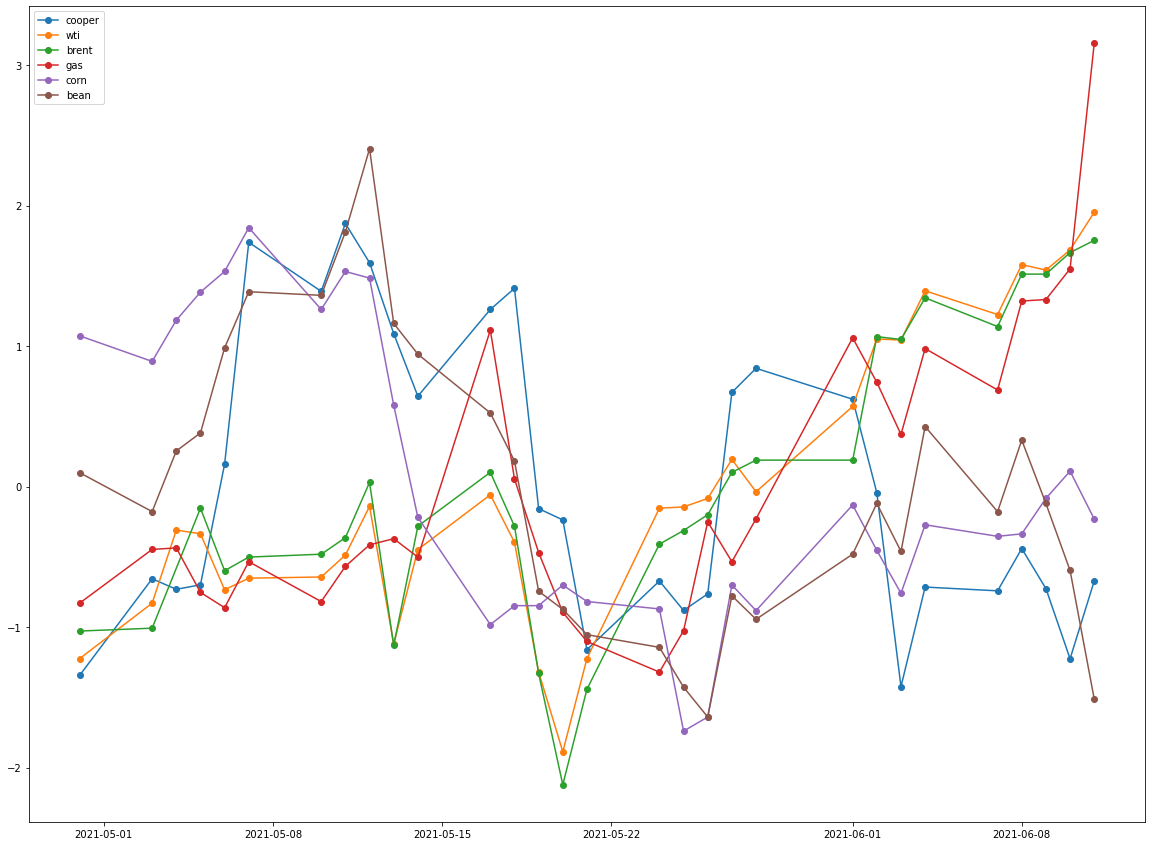

In [76]:
plt.figure(figsize=(20,15))
for i in range(0,len(commodity)):
    com_scaled.append(scaled(commodity[i]))
    graph(com_scaled[i])
plt.legend(commodity_name)

In [97]:
VaR(gas,99)*100

-8.558310296499169

In [99]:
gas['Close'].pct_change()


Date
2021-04-30         NaN
2021-05-03    0.011941
2021-05-04    0.000337
2021-05-05   -0.009774
2021-05-06   -0.003404
2021-05-07    0.010246
2021-05-10   -0.008790
2021-05-11    0.007844
2021-05-12    0.004738
2021-05-13    0.001347
2021-05-14   -0.004036
2021-05-17    0.049983
2021-05-18   -0.031200
2021-05-19   -0.015936
2021-05-20   -0.013158
2021-05-21   -0.006496
2021-05-24   -0.006882
2021-05-25    0.009356
2021-05-26    0.024373
2021-05-27   -0.008713
2021-05-28    0.009466
2021-06-01    0.039518
2021-06-02   -0.009343
2021-06-03   -0.011057
2021-06-04    0.018415
2021-06-07   -0.008718
2021-06-08    0.018893
2021-06-09    0.000320
2021-06-10    0.006392
2021-06-11    0.046682
Name: Close, dtype: float64

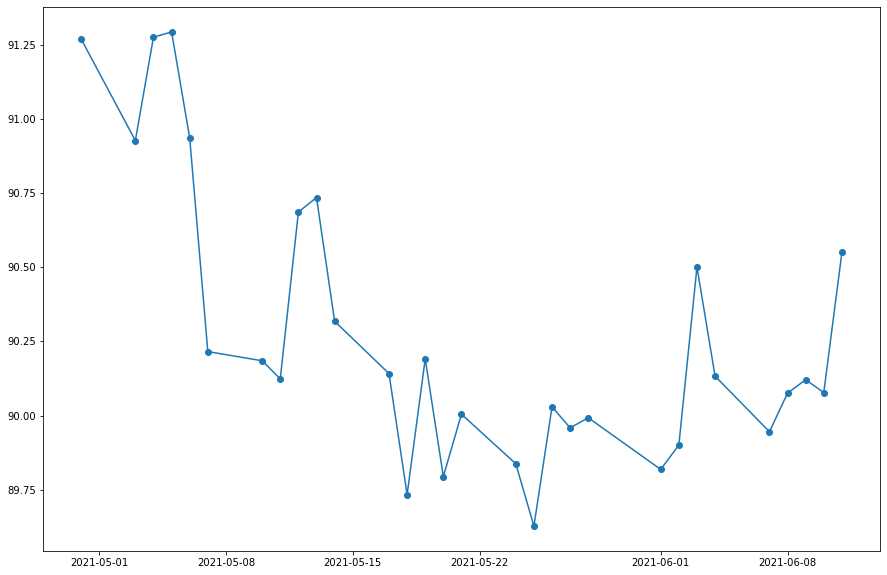

In [7]:
plt.figure(figsize=(15,10))
year_10_data = data(dollar, '2021-05-01')
graph(year_10_data)
